In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly
import cufflinks as cf

In [3]:
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [212]:
import os                  # 파이썬을 이용해 파일을 복사하거나 디렉터리를 생성하고 특정 디렉터리 내의 파일 목록을 구하고자 할 때
import chardet             # 파이썬의 문자열의 인코딩을 인식하기위한 라이브러리
import folium                                 # 지도 관련 시각화
from folium.plugins import MarkerCluster      #지도 군집화 관련 시각화
import geopy.distance                         #거리 계산해주는 패키지 사용

데이터 불러오기

In [4]:
subway = pd.read_csv('subway.csv', encoding='CP949')

In [5]:
subway.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202004,9호선2~3단계,언주,184170,16729,185046,16460,20200503
1,202004,2호선,합정,680012,48502,732794,48049,20200503
2,202004,2호선,을지로3가,399344,51720,403589,50877,20200503
3,202004,2호선,강변(동서울터미널),676082,83345,673317,81844,20200503
4,202004,2호선,봉천,469912,105383,421275,106512,20200503


작업일자 제외

In [6]:
subway = subway.iloc[:,0:7]
subway.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원
0,202004,9호선2~3단계,언주,184170,16729,185046,16460
1,202004,2호선,합정,680012,48502,732794,48049
2,202004,2호선,을지로3가,399344,51720,403589,50877
3,202004,2호선,강변(동서울터미널),676082,83345,673317,81844
4,202004,2호선,봉천,469912,105383,421275,106512


중복데이터 삭제 (2019년 5~7월)

In [65]:
subway.droup_duplicates(subway["사용월"]==201905,keep='first')

AttributeError: 'DataFrame' object has no attribute 'droup_duplicates'

연도, 월 분리, 데이터타입 변환

In [31]:
subway["연도"] = subway["사용월"].astype(str).str[:4]
subway["월"] = subway["사용월"].astype(str).str[4:]
subway['연도'] = subway['연도'].astype(int)
subway['월'] = subway['월'].astype(int)

9호선2~3단계 >> 9호선 으로 변경

In [33]:
subway.loc[subway['호선명'] == '9호선2~3단계','호선명'] = '9호선'
subway.loc[subway['호선명'] == '9호선2단계','호선명'] = '9호선'
subway.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월
0,202004,9호선,언주,184170,16729,185046,16460,2020,4
1,202004,2호선,합정,680012,48502,732794,48049,2020,4
2,202004,2호선,을지로3가,399344,51720,403589,50877,2020,4
3,202004,2호선,강변(동서울터미널),676082,83345,673317,81844,2020,4
4,202004,2호선,봉천,469912,105383,421275,106512,2020,4


1호선 ~ 9호선 데이터만 선택

In [34]:
sub1 = subway[subway['호선명'] == '1호선']
sub2 = subway[subway['호선명'] == '2호선']
sub3 = subway[subway['호선명'] == '3호선']
sub4 = subway[subway['호선명'] == '4호선']
sub5 = subway[subway['호선명'] == '5호선']
sub6 = subway[subway['호선명'] == '6호선']
sub7 = subway[subway['호선명'] == '7호선']
sub8 = subway[subway['호선명'] == '8호선']
sub9 = subway[subway['호선명'] == '9호선']

sub = pd.concat([sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9])

sub.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월
589,202004,1호선,서울역,775859,139595,748330,130554,2020,4
590,202004,1호선,종각,706082,96784,687093,90826,2020,4
591,202004,1호선,종로3가,388837,231829,368220,220625,2020,4
592,202004,1호선,신설동,240865,90729,239399,86446,2020,4
593,202004,1호선,시청,381606,52670,384171,50782,2020,4


In [35]:
# 인덱스 리셋
sub = sub.reset_index(drop=True)
sub.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월
0,202004,1호선,서울역,775859,139595,748330,130554,2020,4
1,202004,1호선,종각,706082,96784,687093,90826,2020,4
2,202004,1호선,종로3가,388837,231829,368220,220625,2020,4
3,202004,1호선,신설동,240865,90729,239399,86446,2020,4
4,202004,1호선,시청,381606,52670,384171,50782,2020,4


In [36]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24165 entries, 0 to 24164
Data columns (total 9 columns):
사용월       24165 non-null int64
호선명       24165 non-null object
지하철역      24165 non-null object
유임승차인원    24165 non-null int64
무임승차인원    24165 non-null int64
유임하차인원    24165 non-null int64
무임하차인원    24165 non-null int64
연도        24165 non-null int32
월         24165 non-null int32
dtypes: int32(2), int64(5), object(2)
memory usage: 1.5+ MB


In [37]:
col_list = ['유임승차인원','무임승차인원','유임하차인원','무임하차인원']
sub[col_list] = sub[col_list]/1000

In [38]:
sub.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월
0,202004,1호선,서울역,775.859,139.595,748.330,130.554,2020,4
1,202004,1호선,종각,706.082,96.784,687.093,90.826,2020,4
2,202004,1호선,종로3가,388.837,231.829,368.220,220.625,2020,4
3,202004,1호선,신설동,240.865,90.729,239.399,86.446,2020,4
4,202004,1호선,시청,381.606,52.670,384.171,50.782,2020,4


유임승하차인원, 무임승하차인원, 승하차인원 열추가

In [39]:
sub.loc[:,'유임승하차인원'] = (sub['유임승차인원']+sub['유임하차인원'])
sub.loc[:,'무임승하차인원'] = (sub['무임승차인원']+sub['무임하차인원'])
sub.loc[:,'승하차인원'] = (sub['유임승하차인원']+sub['무임승하차인원'])

승차인원, 하차인원 열 추가

In [40]:
sub.loc[:,'승차인원'] = (sub['유임승차인원']+sub['무임승차인원'])
sub.loc[:,'하차인원'] = (sub['유임하차인원']+sub['무임하차인원'])

유,무임하차율 열 추가

In [45]:
sub.loc[:,'유임하차율'] = sub['유임하차인원']/sub['하차인원']*100
sub.loc[:,'무임하차율'] = sub['무임하차인원']/sub['하차인원']*100

In [46]:
sub.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월,유임승하차인원,무임승하차인원,승하차인원,승차인원,하차인원,유임하차율,무임하차율
0,202004,1호선,서울역,775.859,139.595,748.330,130.554,2020,4,1524.189,270.149,1794.338,915.454,878.884,85.145480,14.854520
1,202004,1호선,종각,706.082,96.784,687.093,90.826,2020,4,1393.175,187.610,1580.785,802.866,777.919,88.324491,11.675509
2,202004,1호선,종로3가,388.837,231.829,368.220,220.625,2020,4,757.057,452.454,1209.511,620.666,588.845,62.532585,37.467415
3,202004,1호선,신설동,240.865,90.729,239.399,86.446,2020,4,480.264,177.175,657.439,331.594,325.845,73.470208,26.529792
4,202004,1호선,시청,381.606,52.670,384.171,50.782,2020,4,765.777,103.452,869.229,434.276,434.953,88.324716,11.675284


2018년 12월 ~ 2019년 4월 데이터

In [47]:
sub_1812_1904 = sub[(sub.사용월 == 201812) | (sub.사용월 == 201901) | 
                    (sub.사용월 == 201902) | (sub.사용월 == 201903) | (sub.사용월 == 201904)]

2019년 12월 ~ 2020년 4월 데이터

In [48]:
sub_1912_2004 = sub[(sub.사용월 == 201912) | (sub.사용월 == 202001) | 
                    (sub.사용월 == 202002) | (sub.사용월 == 202003) | (sub.사용월 == 202004)]

2019년 1월 ~ 2019년 4월 데이터, 2019년 12월 ~ 2020년 4월 데이터 비교

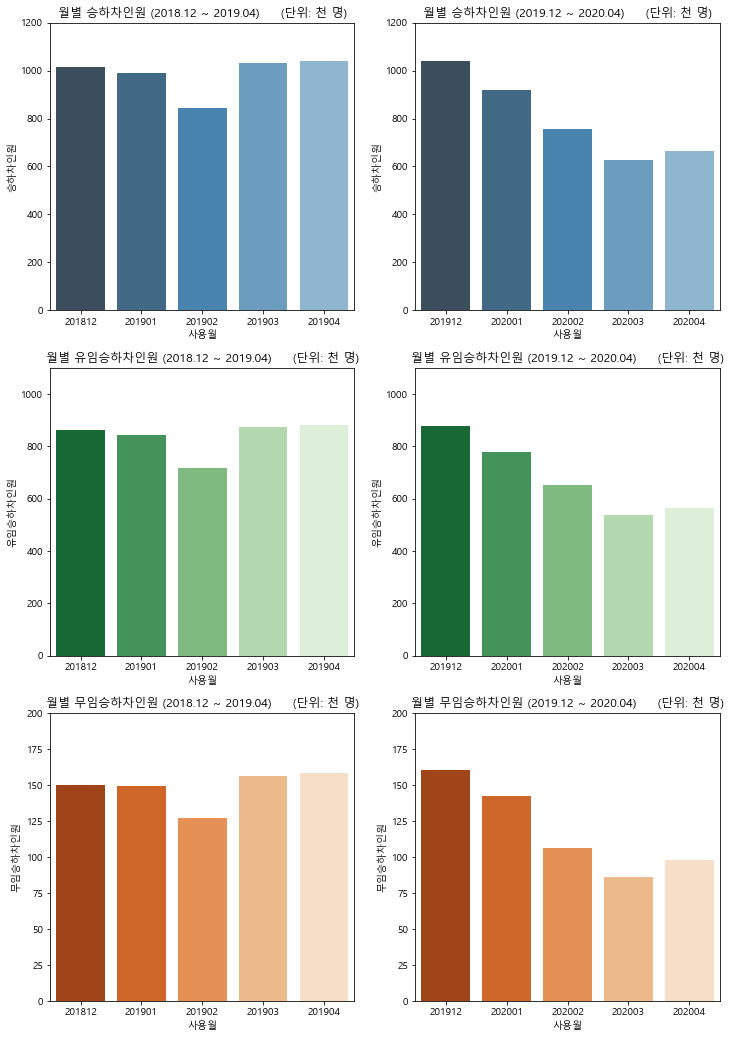

In [49]:
plt.figure(figsize=(12,18))
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(3,2,1)
plt.ylim(0,1200)
plt.title('월별 승하차인원 (2018.12 ~ 2019.04)     (단위: 천 명)')
sns.barplot(x='사용월', y='승하차인원', data=sub_1812_1904, ci=False, palette="Blues_d")

plt.subplot(3,2,2)
plt.ylim(0,1200)
plt.title('월별 승하차인원 (2019.12 ~ 2020.04)     (단위: 천 명)')
sns.barplot(x='사용월', y='승하차인원', data=sub_1912_2004, ci=False, palette="Blues_d");

plt.subplot(3,2,3)
plt.ylim(0,1100)
plt.title('월별 유임승하차인원 (2018.12 ~ 2019.04)     (단위: 천 명)')
sns.barplot(x='사용월', y='유임승하차인원', data=sub_1812_1904, ci=False, palette="Greens_r")

plt.subplot(3,2,4)
plt.ylim(0,1100)
plt.title('월별 유임승하차인원 (2019.12 ~ 2020.04)     (단위: 천 명)')
sns.barplot(x='사용월', y='유임승하차인원', data=sub_1912_2004, ci=False, palette="Greens_r")

plt.subplot(3,2,5)
plt.ylim(0,200)
plt.title('월별 무임승하차인원 (2018.12 ~ 2019.04)     (단위: 천 명)')
sns.barplot(x='사용월', y='무임승하차인원', data=sub_1812_1904, ci=False, palette="Oranges_r")

plt.subplot(3,2,6)
plt.ylim(0,200)
plt.title('월별 무임승하차인원 (2019.12 ~ 2020.04)     (단위: 천 명)')
sns.barplot(x='사용월', y='무임승하차인원', data=sub_1912_2004, ci=False, palette="Oranges_r");

호선별 무임하차율 시각화

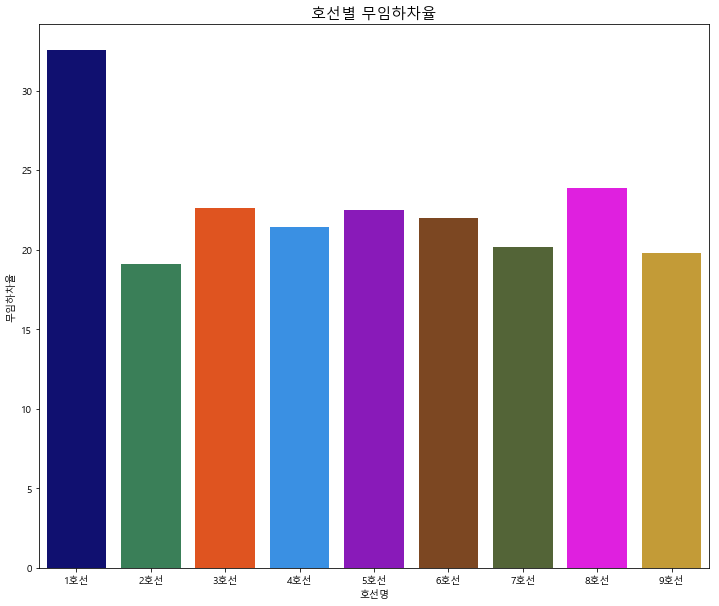

In [50]:
plt.figure(figsize=(12,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('호선별 무임하차율', size=15)
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

sns.barplot(x='호선명', y='무임하차율', data=sub, ci=False, palette=pal)

지하철역별 승하차인원

In [51]:
sub01 = sub[['지하철역','승하차인원']]
sub01.head()

,지하철역,승하차인원
0,서울역,1794.338
1,종각,1580.785
2,종로3가,1209.511
3,신설동,657.439
4,시청,869.229


In [52]:
sub01[sub01['지하철역']=='종각'].sum()[1]

203110.005

In [53]:
stations = sub.지하철역.unique()
n = []
for st in stations:
    a = sub01[sub01['지하철역'] == st].sum()[1]
    n.append(a)

sub02 = pd.DataFrame({'지하철역':stations, '승하차인원':n})
sub02 = sub02.sort_values(['승하차인원'], ascending=[False])
sub02 = sub02.reset_index(drop=True)

sub02_top10 = sub02.head(10)
sub02_top10

,지하철역,승하차인원
0,강남,470338.425
1,고속터미널,449813.528
2,홍대입구,376072.846
3,사당,345070.020
4,서울역,340853.760
5,잠실(송파구청),337662.693
6,신림,329156.352
7,건대입구,298860.575
8,구로디지털단지,293356.811
9,신도림,283584.674


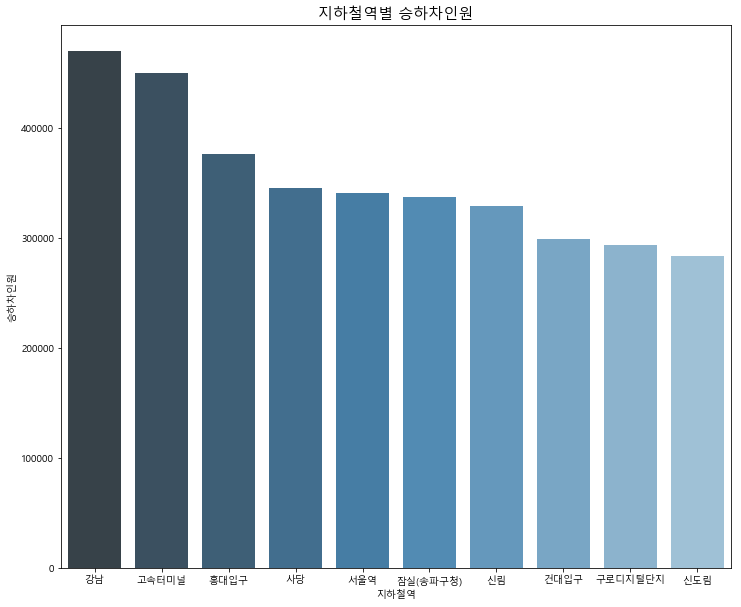

In [54]:
plt.figure(figsize=(12,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('지하철역별 승하차인원', size=15)

sns.barplot(x='지하철역', y='승하차인원', data=sub02_top10, ci=False, palette='Blues_d')
# 구로디지털단지, 신림을 제외하고 나머지는 모두 환승역. 환승역에서 유동인구가 많다는 것을 보여줌
# 연도별로 나눠봐야함

지하철역 위치정보의 encoding 정보 찾기

In [181]:
# with open('location/서울시 역코드로 지하철역 위치 조회.csv', 'rb') as f:
with open('C:/Users/banya/01.빅데이터_분석과정_교육훈련/00_project/1차/location/서울시 역코드로 지하철역 위치 조회.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
print(result)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [183]:
# os.chdir("location")
os.chdir("C:/Users/banya/01.빅데이터_분석과정_교육훈련/00_project/1차/location")

dfs = [pd.read_csv(f,encoding="EUC-KR",index_col=[0], parse_dates=[0], engine='python') for f in os.listdir(os.getcwd()) if f.endswith('csv')]
# # pre_subway_location = pd.concat(dfs, axis=1, join='inner').sort_index()
pre_subway_location = pd.concat(dfs,ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [184]:
pre_subway_location.head()

,X좌표,X좌표(WGS),Y좌표,Y좌표(WGS),사이버스테이션,외부코드,전철역명,호선
0,525992.0,37.492522,1108579.0,127.118234,2818.0,817,가락시장,8
1,525992.0,37.492522,1108579.0,127.118234,2818.0,350,가락시장,3
2,498060.0,37.571607,1130332.0,126.991806,153.0,534,종로3가,5
3,498060.0,37.571607,1130332.0,126.991806,153.0,329,종로3가,3
4,498060.0,37.571607,1130332.0,126.991806,153.0,130,종로3가,1


In [185]:
len(pre_subway_location)

19171

In [137]:
sub

,사용월,호선명,전철역명,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월,유임승하차인원,무임승하차인원,승하차인원,승차인원,하차인원,유임하차율,무임하차율
0,202004,1호선,서울역,775.859,139.595,748.330,130.554,2020,4,1524.189,270.149,1794.338,915.454,878.884,85.145480,14.854520
1,202004,1호선,종각,706.082,96.784,687.093,90.826,2020,4,1393.175,187.610,1580.785,802.866,777.919,88.324491,11.675509
2,202004,1호선,종로3가,388.837,231.829,368.220,220.625,2020,4,757.057,452.454,1209.511,620.666,588.845,62.532585,37.467415
3,202004,1호선,신설동,240.865,90.729,239.399,86.446,2020,4,480.264,177.175,657.439,331.594,325.845,73.470208,26.529792
4,202004,1호선,시청,381.606,52.670,384.171,50.782,2020,4,765.777,103.452,869.229,434.276,434.953,88.324716,11.675284
5,202004,1호선,청량리,283.166,222.227,276.754,225.805,2020,4,559.920,448.032,1007.952,505.393,502.559,55.068957,44.931043
6,202004,1호선,동대문,187.667,97.137,190.186,99.317,2020,4,377.853,196.454,574.307,284.804,289.503,65.693965,34.306035
7,202004,1호선,동묘앞,109.891,124.654,122.030,125.843,2020,4,231.921,250.497,482.418,234.545,247.873,49.230856,50.769144
8,202004,1호선,종로5가,315.667,200.562,325.844,192.744,2020,4,641.511,393.306,1034.817,516.229,518.588,62.832923,37.167077
9,202004,1호선,제기동,199.566,215.954,194.428,231.300,2020,4,393.994,447.254,841.248,415.520,425.728,45.669535,54.330465


In [186]:
subway_location=pre_subway_location[['X좌표(WGS)','Y좌표(WGS)']].groupby(pre_subway_location['전철역명']).mean()

In [187]:
subway_location.head()

,X좌표(WGS),Y좌표(WGS)
전철역명,,
419민주묘지,NaN,NaN
가능,37.748577,127.044213
가락시장,37.492522,127.118234
가산디지털단지,37.481072,126.882343
가양,37.561391,126.854456


In [188]:
sub['지하철명']=sub['전철역명'].str.split('(').str[0]
subway_location['전철역명']=subway_location.index

In [189]:
subway_location.loc[subway_location["전철역명"] == '서울','전철역명'] = '서울역'

In [190]:
subway_location[subway_location["전철역명"]=='서울역']

,X좌표(WGS),Y좌표(WGS),전철역명
전철역명,,,
서울,37.554648,126.972559,서울역


In [152]:
sub.columns

Index(['사용월', '호선명', '전철역명', '유임승차인원', '무임승차인원', '유임하차인원', '무임하차인원', '연도', '월',
       '유임승하차인원', '무임승하차인원', '승하차인원', '승차인원', '하차인원', '유임하차율', '무임하차율'],
      dtype='object')

원본데이터와 위도경도데이터 결합

In [191]:
sub=sub[['사용월', '호선명', '전철역명', '유임승차인원', '무임승차인원', '유임하차인원', '무임하차인원', '연도', '월',
       '유임승하차인원', '무임승하차인원', '승하차인원', '승차인원', '하차인원', '유임하차율', '무임하차율']]

In [154]:
sub.head()

,사용월,호선명,전철역명,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월,유임승하차인원,무임승하차인원,승하차인원,승차인원,하차인원,유임하차율,무임하차율
0,202004,1호선,서울역,775.859,139.595,748.330,130.554,2020,4,1524.189,270.149,1794.338,915.454,878.884,85.145480,14.854520
1,202004,1호선,종각,706.082,96.784,687.093,90.826,2020,4,1393.175,187.610,1580.785,802.866,777.919,88.324491,11.675509
2,202004,1호선,종로3가,388.837,231.829,368.220,220.625,2020,4,757.057,452.454,1209.511,620.666,588.845,62.532585,37.467415
3,202004,1호선,신설동,240.865,90.729,239.399,86.446,2020,4,480.264,177.175,657.439,331.594,325.845,73.470208,26.529792
4,202004,1호선,시청,381.606,52.670,384.171,50.782,2020,4,765.777,103.452,869.229,434.276,434.953,88.324716,11.675284


In [192]:
df = pd.merge(sub, subway_location,how='left',on='전철역명')

In [160]:
# subway_location.to_csv("전철역.csv", encoding='cp949')

In [193]:
df.head()

,사용월,호선명,전철역명,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월,유임승하차인원,무임승하차인원,승하차인원,승차인원,하차인원,유임하차율,무임하차율,X좌표(WGS),Y좌표(WGS)
0,202004,1호선,서울역,775.859,139.595,748.330,130.554,2020,4,1524.189,270.149,1794.338,915.454,878.884,85.145480,14.854520,37.554648,126.972559
1,202004,1호선,종각,706.082,96.784,687.093,90.826,2020,4,1393.175,187.610,1580.785,802.866,777.919,88.324491,11.675509,37.570161,126.982923
2,202004,1호선,종로3가,388.837,231.829,368.220,220.625,2020,4,757.057,452.454,1209.511,620.666,588.845,62.532585,37.467415,37.571607,126.991806
3,202004,1호선,신설동,240.865,90.729,239.399,86.446,2020,4,480.264,177.175,657.439,331.594,325.845,73.470208,26.529792,37.575297,127.025087
4,202004,1호선,시청,381.606,52.670,384.171,50.782,2020,4,765.777,103.452,869.229,434.276,434.953,88.324716,11.675284,37.564718,126.977108


In [198]:
df_전철역_summary=df[['유임승하차인원','무임승하차인원','승하차인원','X좌표(WGS)','Y좌표(WGS)']].groupby(df['전철역명']).mean().sort_values(by=['승하차인원'], axis=0, ascending=False).dropna().head(20)

df_전철역_summary['무임비율']=df_전철역_summary['무임승하차인원']/df_전철역_summary['승하차인원']*100

In [207]:
df_전철역_summary.describe()

,유임승하차인원,무임승하차인원,승하차인원,X좌표(WGS),Y좌표(WGS),무임비율
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2704.783275,491.310646,3196.093921,37.524563,126.989450,15.762198
std,861.023953,112.242411,938.186620,0.043932,0.065203,2.935255
min,1799.432288,295.356538,2211.987308,37.476530,126.882343,10.788215
25%,2150.477830,419.250848,2560.047577,37.485000,126.935099,13.301616
50%,2498.266276,464.023577,2956.585147,37.508784,126.984624,16.247867
75%,3021.978125,562.980083,3539.081478,37.558141,127.035087,17.238538
max,5323.427051,719.862615,6029.979808,37.638052,127.102234,23.176028


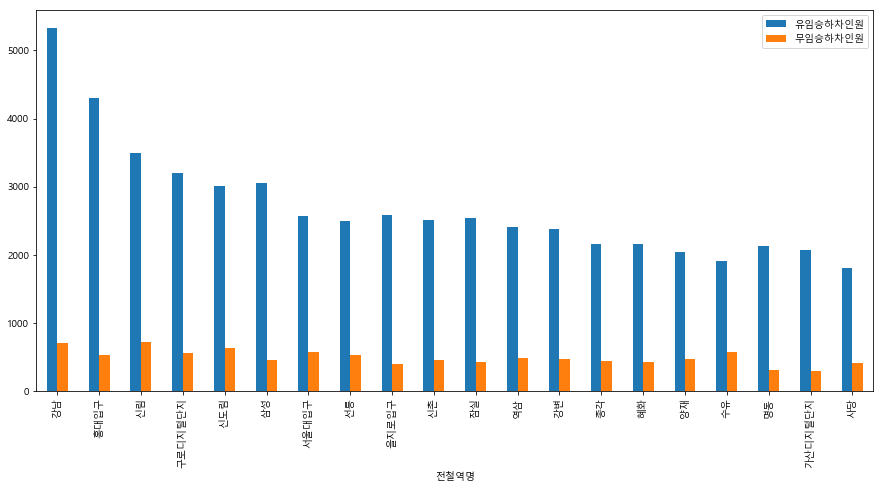

In [200]:
plt.rcParams['font.family'] = 'Malgun Gothic'
df_전철역_summary[['유임승하차인원','무임승하차인원']].plot(kind='bar',figsize=(15,7))

In [201]:
df_강남_시계열_summary=df[df['전철역명'].isin(['강남'])]
df_강남_시계열_summary=df_강남_시계열_summary[['유임승하차인원','무임승하차인원','X좌표(WGS)','Y좌표(WGS)']].groupby(df_강남_시계열_summary['사용월']).mean().sort_values(by=['사용월'], axis=0, ascending=True)

# df_강남_시계열_summary.set_index('사용월',inplace=True)
df_강남_시계열_summary

# pd.pivot_table(df_강남_시계열_summary, index = ['사용월','전철역명'], values = '유임승차인원', aggfunc = 'mean')

,유임승하차인원,무임승하차인원,X좌표(WGS),Y좌표(WGS)
사용월,,,,
201501,3430.779,3502.442,37.497175,127.027926
201502,2815.536,2863.629,37.497175,127.027926
201503,3218.542,3265.686,37.497175,127.027926
201504,2990.692,2965.670,37.497175,127.027926
201505,2902.168,2952.508,37.497175,127.027926
201506,2709.582,2742.636,37.497175,127.027926
201507,3295.064,3344.734,37.497175,127.027926
201508,3021.868,3070.267,37.497175,127.027926
201509,2710.746,2757.137,37.497175,127.027926


In [205]:
df_전철역_summary.sort_values(by=['무임승하차인원'], axis=0, ascending=False).head(20)

,유임승하차인원,무임승하차인원,승하차인원,X좌표(WGS),Y좌표(WGS),무임비율
전철역명,,,,,,
신림,3500.090615,719.862615,4219.953231,37.484201,126.929715,17.058545
강남,5323.427051,706.552756,6029.979808,37.497175,127.027926,11.717332
신도림,3013.233436,622.467513,3635.700949,37.508725,126.891295,17.120977
수유,1910.258577,576.281141,2486.539718,37.638052,127.025732,23.176028
서울대입구,2572.040256,566.236833,3138.277090,37.481247,126.952739,18.042920
구로디지털단지,3199.090256,561.894500,3760.984756,37.485266,126.901401,14.940090
선릉,2494.221821,532.423949,3026.645769,37.504503,127.049008,17.591221
홍대입구,4301.298679,520.148064,4821.446744,37.557192,126.925381,10.788215
역삼,2401.701026,479.437154,2881.138179,37.500622,127.036456,16.640547


In [206]:
df_전철역_summary.sort_values(by=['무임비율'], axis=0, ascending=False).head(20)

,유임승하차인원,무임승하차인원,승하차인원,X좌표(WGS),Y좌표(WGS),무임비율
전철역명,,,,,,
수유,1910.258577,576.281141,2486.539718,37.638052,127.025732,23.176028
양재,2036.909551,467.613795,2504.523346,37.484147,127.034631,18.670770
사당,1799.432288,412.555019,2211.987308,37.476530,126.981685,18.650876
서울대입구,2572.040256,566.236833,3138.277090,37.481247,126.952739,18.042920
선릉,2494.221821,532.423949,3026.645769,37.504503,127.049008,17.591221
신도림,3013.233436,622.467513,3635.700949,37.508725,126.891295,17.120977
신림,3500.090615,719.862615,4219.953231,37.484201,126.929715,17.058545
종각,2161.708846,442.265577,2603.974423,37.570161,126.982923,16.984252
역삼,2401.701026,479.437154,2881.138179,37.500622,127.036456,16.640547


In [219]:
#-*- coding:utf-8 -*-

map =folium.Map(location=[37.5502, 126.982], zoom_start=12)
# map =folium.Map(location=[37.5502, 126.982], zoom_start=12, tiles='cartodbpositron')

for n in df_전철역_summary.index:
    folium.CircleMarker([df_전철역_summary['X좌표(WGS)'][n], df_전철역_summary['Y좌표(WGS)'][n]],popup=n,tooltip=n, Encoding='utf-8',
                        radius = df_전철역_summary['승하차인원'][n]/150,
                        color='#3186cc', fill_color='#3186cc').add_to(map)

# marker_cluster = MarkerCluster().add_to(map)
# for n in df_전철역_summary.index:
#   folium.Marker( location = [df_전철역_summary['X좌표(WGS)'][n],df_전철역_summary['Y좌표(WGS)'][n]], popup= n, icon=folium.Icon(color='cadetblue',icon='ok')).add_to(marker_cluster)

map

무임하차율을 기준으로 내림차순으로 데이터를 정렬
# 특정 월을 선택하는게 아니면 중복된 역 나타남 어떻게 할지 생각하기..

In [27]:
sub01 = sub.iloc[:,1:]
sub01 = sub01.sort_values(['무임하차율'], ascending=[False])

# plotting 할 때 문제생길수도 있으므로 인덱스 리셋
sub01 = sub01.reset_index(drop=True)

In [28]:
sub01.head()

,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월,유임승하차인원,무임승하차인원,승하차인원,승차인원,하차인원,유임하차율,무임하차율
0,1호선,제기동,271.607,358.897,267.108,386.589,2018,09,538.715,745.486,1284.201,630.504,653.697,40.861133,59.138867
1,6호선,청구,63.070,72.605,12.018,17.004,2015,01,75.088,89.609,164.697,135.675,29.022,41.409965,58.590035
2,1호선,제기동,260.659,335.767,255.740,360.747,2020,01,516.399,696.514,1212.913,596.426,616.487,41.483438,58.516562
3,4호선,서울역,317.720,613.182,40.358,56.290,2015,10,358.078,669.472,1027.550,930.902,96.648,41.757719,58.242281
4,1호선,제기동,264.818,332.466,256.270,356.572,2019,09,521.088,689.038,1210.126,597.284,612.842,41.816651,58.183349


In [174]:
sub01_top10 = sub01[:10]
sub01_top10

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월,유임승하차인원,무임승하차인원,승하차인원,승차인원,하차인원,유임하차율,무임하차율
0,201809,1호선,제기동,271.607,358.897,267.108,386.589,2018,09,538.715,745.486,1284.201,630.504,653.697,40.861133,59.138867
1,201501,6호선,청구,63.070,72.605,12.018,17.004,2015,01,75.088,89.609,164.697,135.675,29.022,41.409965,58.590035
2,202001,1호선,제기동,260.659,335.767,255.740,360.747,2020,01,516.399,696.514,1212.913,596.426,616.487,41.483438,58.516562
3,201510,4호선,서울역,317.720,613.182,40.358,56.290,2015,10,358.078,669.472,1027.550,930.902,96.648,41.757719,58.242281
4,201909,1호선,제기동,264.818,332.466,256.270,356.572,2019,09,521.088,689.038,1210.126,597.284,612.842,41.816651,58.183349
5,201901,1호선,제기동,293.540,374.571,288.217,400.607,2019,01,581.757,775.178,1356.935,668.111,688.824,41.841893,58.158107
6,201906,1호선,제기동,272.032,338.251,262.364,360.782,2019,06,534.396,699.033,1233.429,610.283,623.146,42.103135,57.896865
7,201906,1호선,제기동,272.032,338.251,262.364,360.782,2019,06,534.396,699.033,1233.429,610.283,623.146,42.103135,57.896865
8,201906,1호선,제기동,272.032,338.251,262.364,360.782,2019,06,534.396,699.033,1233.429,610.283,623.146,42.103135,57.896865
9,201906,1호선,제기동,272.032,338.251,262.364,360.782,2019,06,534.396,699.033,1233.429,610.283,623.146,42.103135,57.896865


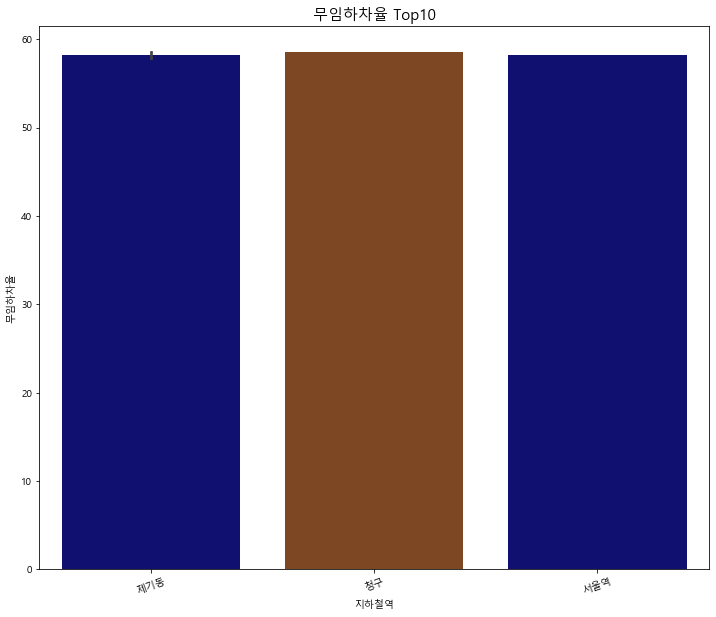

In [177]:
plt.figure(figsize=(12,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('무임하차율 Top10', size=15)
plt.xticks(rotation=20)
pal2 = ['navy','saddlebrown','navy','dodgerblue','navy','navy','navy','navy','navy']
sns.barplot(x='지하철역', y='무임하차율', data=sub01_top10, palette=pal2)

In [67]:
get_off_list = sub[['유임하차율','무임하차율']]